# Music generation with Muse GAN

## Digital music representation

Our goal is to master the art of building and training a GAN model from scratch for music generation. To achieve this, we need to start with the fundamentals of music theory, including understanding musical notes, octaves, and pitch numbers. Following that, we’ll dive into the inner workings of digital music, specifically focusing on MIDI files.

### Musical notes, octave, and pitch

We’ll be working with a training dataset that represents music pieces as 4D objects. To grasp the meaning of the music pieces in the training data, it’s essential to first familiarize ourselves with some fundamental concepts in music theory, such as musical notes, octaves, and pitch. These concepts are interrelated and crucial for understanding the dataset.

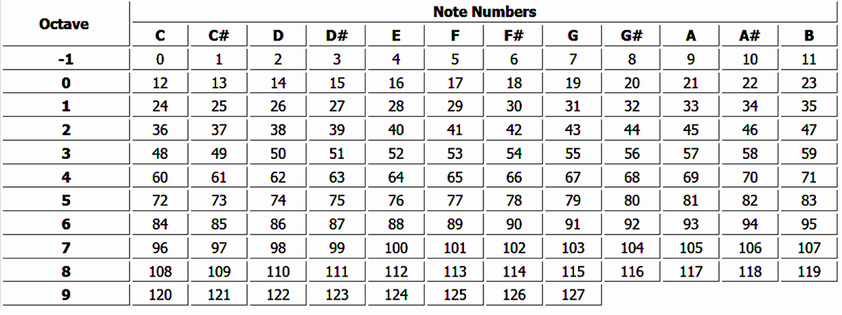

*The relationship between musical notes, octaves, and pitches (also known as note numbers). The first column displays the 11 octaves (ranging from –1 to 9), representing different levels of musical sound. Each octave is subdivided into 12 semitones, which are listed in the top row: C, C#, D, D#, ..., B. Within each octave, each note is assigned a specific pitch number, ranging from 0 to 127*

**A musical note is a symbol representing a specific sound in music. These notes are the foundational elements of music, used to craft melodies, chords, and rhythms.** Each note is assigned a name (such as A, B, C, D, E, F, G) and corresponds to a specific frequency, which determines its pitch: whether the note sounds high or low. For instance, a middle C (C4) typically has a frequency of about 262 hertz, meaning its sound waves vibrate 262 times per second.

You might be wondering about the meaning of the term “middle C (C4).” **The number 4 in C4 refers to the octave, which is the distance between one level of musical pitch and the next.** The far-left column displays 11 octave levels, ranging from –1 to 9. The frequency of a sound doubles as you move from one octave level to the next. For example, note A4 is usually tuned to 440 hertz, while A5, one octave above A4, is tuned to 880 hertz.

In Western music, an octave is divided into 12 semitones, each corresponding to a specific note. The top row lists these 12 semitones: C, C#, D, D#, ..., B. Moving up or down by 12 semitones takes you to the same note name but in a higher or lower octave. As mentioned earlier, A5 is one octave above A4.

Each note within a specific octave is assigned a pitch number, ranging from 0 to 127. For example, the note C4 has a pitch number of 60, while F3 has a pitch number of 53. **The pitch number is a more efficient way to represent musical notes since it specifies both the octave level and the semitone.** The training data you’ll be using in this chapter is encoded using pitch numbers for this very reason.

### An introduction to multitrack music

Let’s first talk about how multitrack music works and how it is represented digitally. In electronic music production, a “track” typically refers to an individual layer or component of the music, such as a drum track, a bass track, or a melody track. In classical music, tracks might represent different vocal parts, like soprano, alto, tenor, and bass. For instance, the training dataset we’re using in this chapter, the JSB Chorales dataset, consists of four tracks corresponding to four vocal parts. In music production, each track can be individually edited and processed within a digital audio workstation (DAW). These tracks are composed of various musical elements, including bars, steps, and notes.

A bar (or measure) is a segment of time defined by a specified number of beats, with each beat having a certain note duration. In many popular music genres, a bar typically contains four beats, although this can vary based on the time signature of the piece. The total number of bars in a track is determined by the track’s length and structure. For example, in our training dataset, each track comprises two bars.

In the context of step sequencing, a technique commonly used for programming rhythms and melodies in electronic music, a “step” represents a subdivision of a bar. In a standard 4/4 time signature (four beats in a bar and four steps in a beat), you might find 16 steps per bar, with each step corresponding to a sixteenth of a bar.

Lastly, each step contains a musical note. In our dataset, we limit the range to the 84 most frequently used notes (with pitch numbers from 0 to 83). Therefore, the musical note in a step is encoded as a one-hot vector with 84 values.

**We’ll use the music21 Python library, a powerful and comprehensive toolkit designed for music analysis, composition, and manipulation, to visualize how various music concepts work.**

In [ ]:
!pip install music21

**Now we load the example midi file and see how it looks in text format**

In [ ]:
from music21 import midi

# Read the MIDI file
mf = midi.MidiFile()
mf.open("/content/example.midi")  # Replace with the name of the uploaded
mf.read()
mf.close()

# Convert MIDI to a Stream
stream = midi.translate.midiFileToStream(mf)

# Display in text format
#print(stream.show('text'))

**We plot the file for a better view**

/usr/local/lib/python3.11/dist-packages/music21/stream/base.py:3689: Music21DeprecationWarning: .flat is deprecated.  Call .flatten() instead
  return self.iter().getElementsByClass(classFilterList)


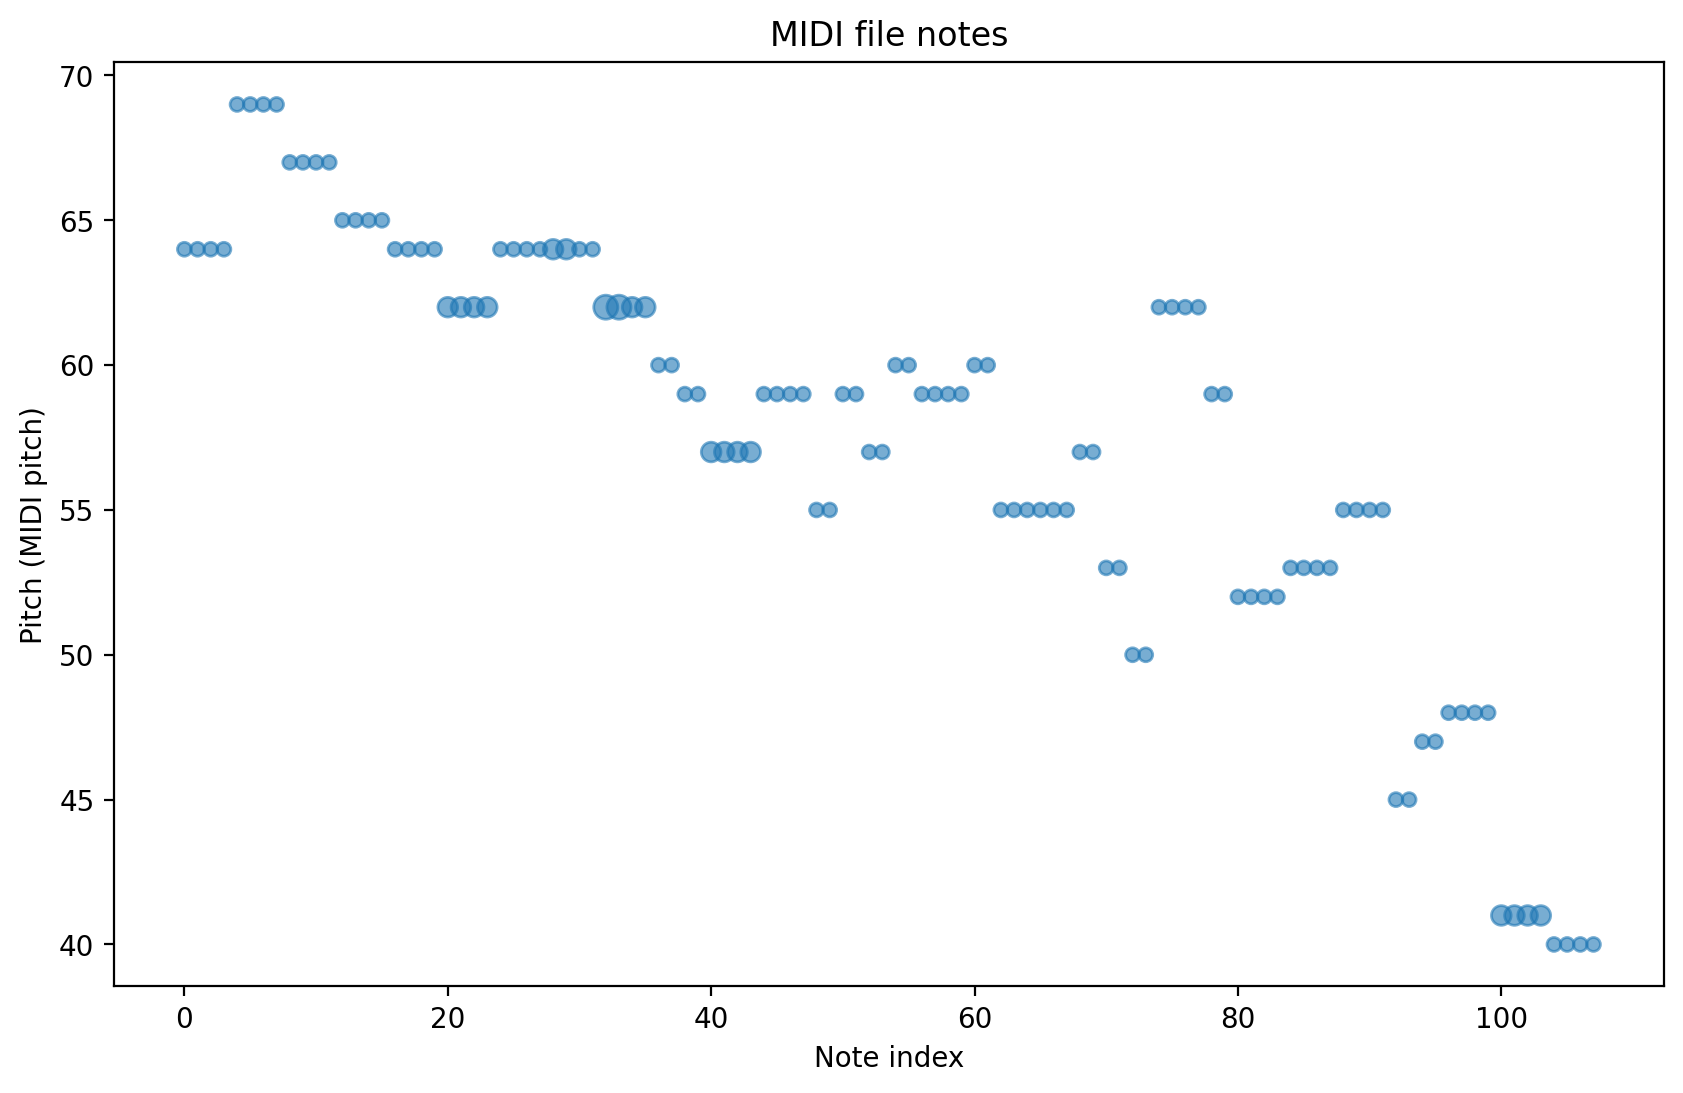

In [ ]:
import matplotlib.pyplot as plt

# Get the notes and durations of the Stream
notes = [note for note in stream.flat.notes]

# Create pitch and duration lists
pitches = [n.pitch.midi for n in notes]
durations = [n.quarterLength for n in notes]

# Plot the notes
plt.figure(figsize=(10, 6))
plt.scatter(range(len(pitches)), pitches, s=[d * 100 for d in durations], alpha=0.6)
plt.title("MIDI file notes")
plt.xlabel("Note index")
plt.ylabel("Pitch (MIDI pitch)")
plt.show()


**The file rendered in a program like MuseHub, should look something like this**

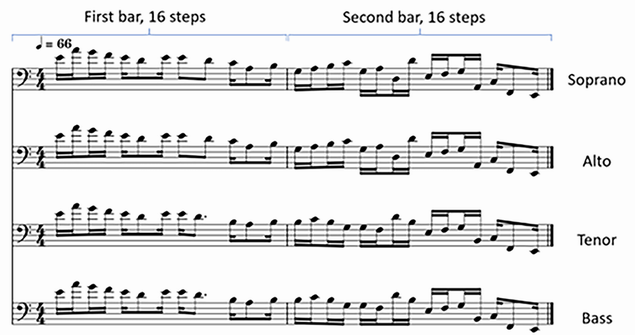

*Staff notation for a piece of music in JSB Chorales dataset. The music has four tracks, representing the four voices in a chorale: soprano, alto, tenor, and bass. The notation is structured into two bars for each track, with the left and right halves representing the first and second bars, respectively. Each bar consists of 16 steps, aligning with the 4/4 time signature where a bar contains four beats, each subdivided into four sixteenth notes. A total of 84 different pitches are possible, and each note is represented as a one-hot vector with 84 values.*

The JSB Chorales dataset, which consists of chorale music pieces by Johann Sebastian Bach, is often used for training machine learning models in music generation tasks. The shape (4, 2, 16, 84) of each music piece in the dataset can be explained as follows. Four represents the four voices in a chorale: soprano, alto, tenor, and bass. Each voice is treated as a separate track in the dataset. Each piece is divided into two bars (also called measures). The dataset is formatted this way to standardize the length of the music pieces for training purposes. The number 16 represents the number of steps (or subdivisions) in each bar. Finally, the note is one-hot encoded with 84 values, denoting the number of possible pitches (or notes) that can be played in each step.

### Digitally represent music: Piano rolls

A piano roll is a visual representation of music often used in MIDI sequencing software and DAWs. It is named after the traditional piano rolls used in player pianos, which contained a physical roll of paper with holes punched in it to represent musical notes. In a digital context, the piano roll serves a similar function but in a virtual format.

The piano roll is displayed as a grid, with time represented horizontally (from left to right) and pitch represented vertically (from bottom to top). Each row corresponds to a specific musical note, with higher notes at the top and lower notes at the bottom, similar to the layout of a piano keyboard.

Notes are represented as bars or blocks on the grid. The position of a note block along the vertical axis indicates its pitch, while its position along the horizontal axis indicates its timing in the music. The length of the note block represents the duration of the note.

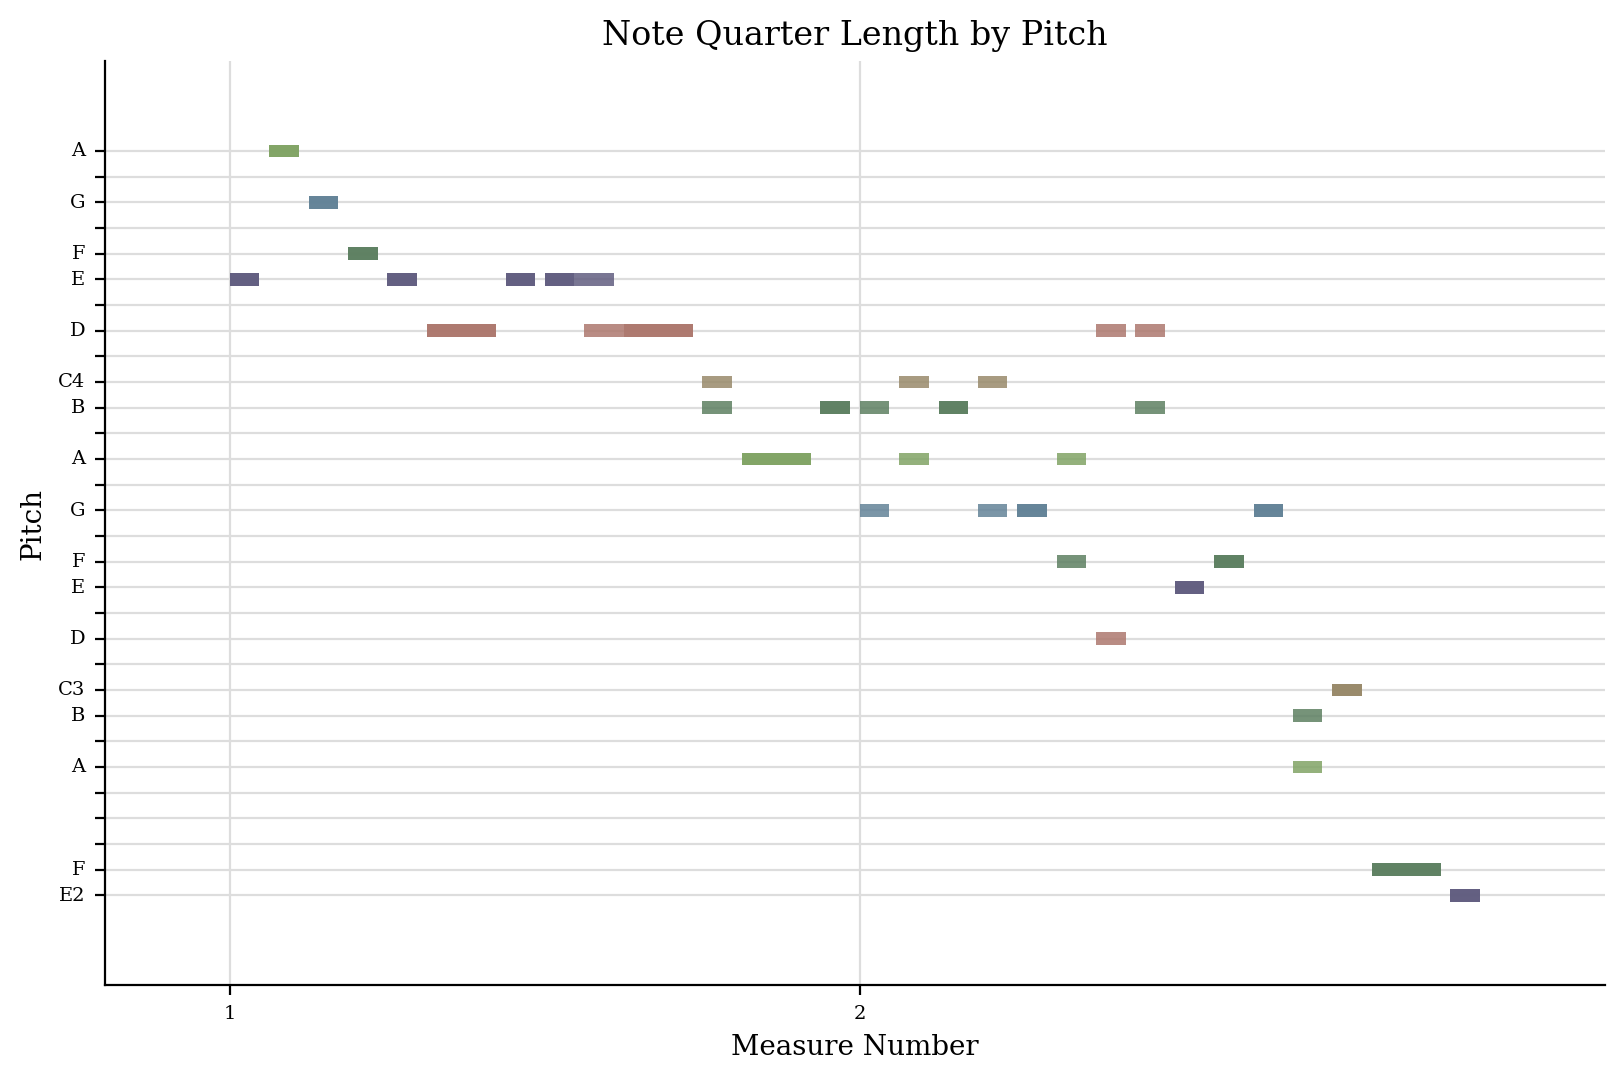

In [ ]:
stream.plot()

*The piano roll for a piece of music. The piano roll is a graphical representation of a musical piece, depicted as a grid with time progressing horizontally from left to right and pitch represented vertically from bottom to top. Each row on the grid corresponds to a distinct musical note, arranged in a manner akin to the keyboard of a piano, with higher notes positioned at the top and lower notes at the bottom. This specific piece of music comprises two bars, resulting in two distinct sections visible in the graph. The vertical placement of a note block signifies its pitch, while its horizontal location indicates when the note is played in the piece. Additionally, the length of the note block reflects the duration for which the note is sustained.*

The music21 library also allows you to see the quantized notes corresponding to the preceding piano roll:

In [ ]:
for n in stream.recurse().notes:
    print(n.offset, n.pitches)

0.0 (<music21.pitch.Pitch E4>,)
0.25 (<music21.pitch.Pitch A4>,)
0.5 (<music21.pitch.Pitch G4>,)
0.75 (<music21.pitch.Pitch F4>,)
1.0 (<music21.pitch.Pitch E4>,)
1.25 (<music21.pitch.Pitch D4>,)
1.75 (<music21.pitch.Pitch E4>,)
2.0 (<music21.pitch.Pitch E4>,)
2.5 (<music21.pitch.Pitch D4>,)
3.0 (<music21.pitch.Pitch C4>,)
3.25 (<music21.pitch.Pitch A3>,)
3.75 (<music21.pitch.Pitch B3>,)
0.0 (<music21.pitch.Pitch G3>,)
0.25 (<music21.pitch.Pitch A3>,)
0.5 (<music21.pitch.Pitch B3>,)
0.75 (<music21.pitch.Pitch C4>,)
1.0 (<music21.pitch.Pitch G3>,)
1.25 (<music21.pitch.Pitch A3>,)
1.5 (<music21.pitch.Pitch D3>,)
1.75 (<music21.pitch.Pitch D4>,)
2.0 (<music21.pitch.Pitch E3>,)
2.25 (<music21.pitch.Pitch F3>,)
2.5 (<music21.pitch.Pitch G3>,)
2.75 (<music21.pitch.Pitch A2>,)
3.0 (<music21.pitch.Pitch C3>,)
3.25 (<music21.pitch.Pitch F2>,)
3.75 (<music21.pitch.Pitch E2>,)
0.0 (<music21.pitch.Pitch E4>,)
0.25 (<music21.pitch.Pitch A4>,)
0.5 (<music21.pitch.Pitch G4>,)
0.75 (<music21.pitch.Pitc

The first value in each line in the previous output represents time. It increases by 0.25 seconds after each line in most cases. If the time increase in the next line is more than 0.25 seconds, it means a note lasts more than 0.25 seconds. As you can see, the starting note is E4. After 0.25 seconds, the note changes to A4, and then G4, and so on. This explains the first three blocks (far left), which have values E, A, and G, respectively.

You might be curious about how to convert the sequence of musical notes into an object with the shape (4, 2, 16, 84). To understand this, let’s examine the pitch number at each time step in the musical notes:

In [ ]:
for n in stream.recurse().notes:
   print(n.offset,n.pitches[0].midi)

0.0 64
0.25 69
0.5 67
0.75 65
1.0 64
1.25 62
1.75 64
2.0 64
2.5 62
3.0 60
3.25 57
3.75 59
0.0 55
0.25 57
0.5 59
0.75 60
1.0 55
1.25 57
1.5 50
1.75 62
2.0 52
2.25 53
2.5 55
2.75 45
3.0 48
3.25 41
3.75 40
0.0 64
0.25 69
0.5 67
0.75 65
1.0 64
1.25 62
1.75 64
2.0 64
2.5 62
3.0 60
3.25 57
3.75 59
0.0 55
0.25 57
0.5 59
0.75 60
1.0 55
1.25 57
1.5 50
1.75 62
2.0 52
2.25 53
2.5 55
2.75 45
3.0 48
3.25 41
3.75 40
0.0 64
0.25 69
0.5 67
0.75 65
1.0 64
1.25 62
1.75 64
2.0 64
2.25 62
3.0 59
3.25 57
3.75 59
0.0 59
0.25 60
0.5 59
0.75 55
1.0 55
1.25 53
1.5 62
1.75 59
2.0 52
2.25 53
2.5 55
2.75 47
3.0 48
3.25 41
3.75 40
0.0 64
0.25 69
0.5 67
0.75 65
1.0 64
1.25 62
1.75 64
2.0 64
2.25 62
3.0 59
3.25 57
3.75 59
0.0 59
0.25 60
0.5 59
0.75 55
1.0 55
1.25 53
1.5 62
1.75 59
2.0 52
2.25 53
2.5 55
2.75 47
3.0 48
3.25 41
3.75 40


The preceding code block has converted the musical note in each time step into a pitch number, in the range of 0 to 83. Each of the pitch numbers is then converted to a one-hot variable with 84 values, with value –1 everywhere, except 1 in one position. We use –1 and 1 in one-hot encoding instead of 0 and 1 because placing values between –1 and 1 centers the data around 0, which can make training more stable and faster. Many activation functions and weight initialization methods assume input data is centered around 0. The next figure illustrates how a piece of MIDI music is encoded into an object in the shape of (4, 2, 16, 84).

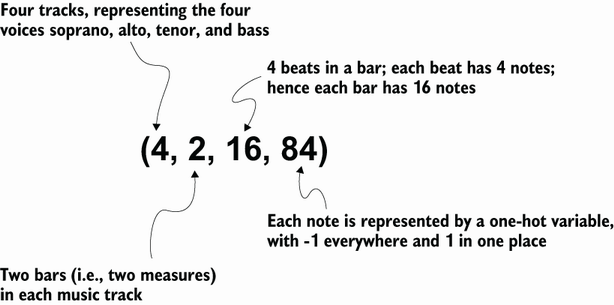

*How to represent a piece of music using a 4D object. In our training data, each piece of music is represented by a 4D object in the shape of (4, 2, 16, 84). The first dimension represents the four music tracks, which are the four voices in the music (soprano, alto, tenor, and bass). Each music track is divided into two bars. There are four beats in each bar, and each beat has four notes; we therefore have 16 notes in a bar. Finally, each note is represented by a one-hot variable with 84 values, with –1 everywhere and 1 in one place.*

## A blueprint for music generation

When creating music, we need to incorporate more detailed inputs for enhanced control and variety. Unlike the approach of utilizing a single noise vector from the latent space for generating shapes, numbers, and images, we will employ four distinct noise vectors in the music generation process. **Since each music piece comprises four tracks and two bars, we’ll utilize four vectors to manage this structure. We’ll use one vector to govern all tracks and bars collectively, another vector to control each bar across all tracks, a third vector to oversee all tracks across bars, and a fourth one to manage each individual bar in each track.** Let's start learning about the concepts of chords, style, melody and groove and how they influence various aspects of music.

### Constructing music with chords, style, melody, and groove

Later, in the music generation stage, we obtain four noise vectors **(chords, style, melody, and groove)** from the latent space and feed them to the generator to create a piece of music. You may be wondering the meaning of these four pieces of information. In music, chords, style, melody, and groove are key elements that contribute to a piece’s overall sound and feel. Next I provide a brief explanation of each element.

**Style** refers to the characteristic way in which music is composed, performed, and experienced. It includes the genre (such as jazz, classical, rock, and so on), the era in which the music was created, and the unique approach of the composer or performer. Style is influenced by cultural, historical, and personal factors, and it helps to define the music’s identity.

**Groove** is the rhythmic feel or swing in music, especially in styles like funk, jazz, and soul. It’s what makes you want to tap your foot or dance. A groove is created by the pattern of accents, the interplay between the rhythm section (drums, bass, etc.), and the tempo. It’s the element that gives music its sense of motion and flow.

**Chords** are combinations of two or more notes played simultaneously. They provide the harmonic foundation for music. Chords are built on scales and are used to create progressions that give music its structure and emotional depth. Different chord types (major, minor, diminished, augmented, etc.) and their arrangements can evoke various moods and feelings in the listener.

Finally, **melody** is the sequence of notes that is most easily recognizable in a piece of music. It’s the part that you might hum or sing along to. Melodies are often built from scales and are characterized by their pitch, rhythm, and contour (the pattern of rises and falls in pitch). A good melody is memorable and expressive, conveying the main musical and emotional themes of the piece.

Together, these elements work in harmony to create the overall sound and experience of a musical piece. Each element has its role, but they all interact and influence each other to produce the final music piece. Specifically, a music piece consists of four tracks, each with two bars, resulting in eight bar/track combinations. We’ll use one noise vector for style, applied to all eight bars. We’ll use eight different noise vectors for melody, each used in a unique bar. There are four noise vectors for groove, each applied to a different track, remaining the same across both bars. Two noise vectors will be used for chords, one for each bar. The next figure provides a diagram of how these four elements contribute to the creation of a complete piece of music.

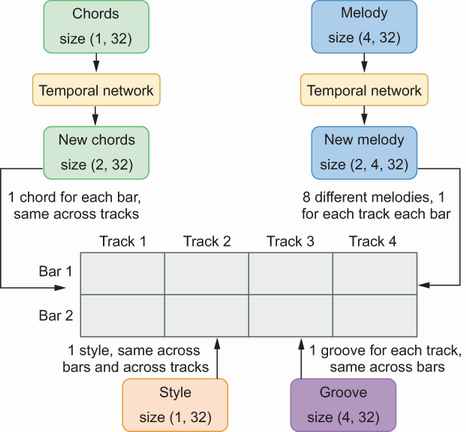

*Music generation using chords, style, melody, and groove. Each music composition consists of four tracks and spans two bars. We will extract four noise vectors from the latent space for this purpose. The first vector, representing chords, has a dimension of (1, 32). This vector will be processed through a temporal network to expand the chords into two (1, 32) vectors, corresponding to the two bars, with identical values across all tracks. The second vector, denoting style, also has a dimension of (1, 32) and remains constant across all tracks and bars. The third vector, melody, is shaped as (4, 32). It will be stretched through a temporal network into two (4, 32) vectors, resulting in eight (1, 32) vectors, each representing a unique track and bar combination. Lastly, the fourth vector, groove, with a dimension of (4, 32), will be applied to the four tracks, maintaining the same values for both bars.*

The generator creates a piece of music by generating one bar in one track at a time. For this, it requires four noise vectors, each with a shape of (1, 32), as input. These vectors represent chords, style, melody, and groove, and each controls a distinct aspect of the music, as previously explained. Since the music piece consists of four tracks, each with two bars, there are a total of eight bar/track combinations. Consequently, we need eight sets of chords, style, melody, and groove to generate all parts of the music piece.

We’ll obtain four noise vectors from the latent space corresponding to chords, style, melody, and groove. We’ll also introduce a temporal network later, whose role is to expand the input along the bar dimension. With two bars, this means doubling the size of the input. Music is inherently temporal, with patterns and structures that unfold over time. The temporal network in MuseGAN is designed to capture these temporal dependencies, ensuring that the generated music has a coherent and logical progression.

The noise vector for chords has a shape of (1, 32). After processing it through the temporal network, we obtain two (1, 32) sized vectors. The first vector is used across all four tracks in the first bar, while the second vector is used across all four tracks in the second bar.

The noise vector for style, also with a shape of (1, 32), is applied uniformly across all eight track/bar combinations. Note that we’ll not pass the style vector through the temporal network since the style vector is designed to be the same across bars.

The noise vector for melody has a shape of (4, 32). When passed through the temporal network, it yields two (4, 32) sized vectors, which further break down into eight (1, 32) sized vectors. Each of these is used in a unique track/bar combination.

Lastly, the noise vector for groove, shaped as (4, 32), is used such that each (1, 32) sized vector is applied to a different track, remaining the same across both bars. We won’t pass the groove vector through the temporal network since the groove vector is designed to be the same across bars.

After generating a bar of music for each of the eight bar/track combinations, we’ll merge them to create a full piece of music, consisting of four distinct tracks, each comprising two unique bars.

###  A blueprint to train a MuseGAN

The style of music generated by MuseGAN is influenced by the training data’s style. Therefore, you should first collect a dataset of Bach’s compositions in a format suitable for training.

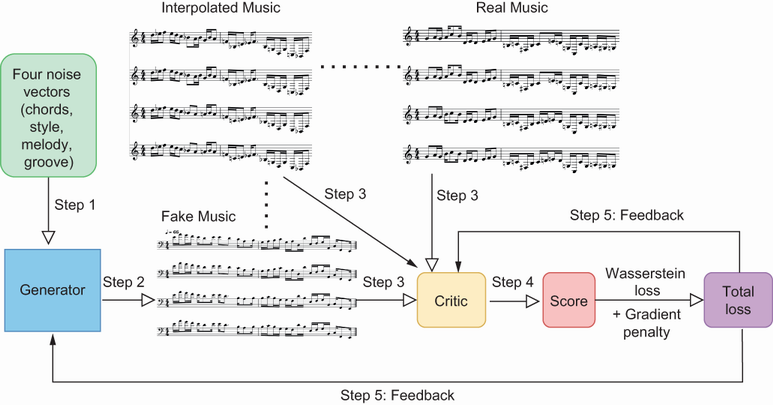

*A diagram of the steps involved in training MuseGAN to generate music. The generator produces a fake music piece by drawing four random noise vectors from the latent space (top left) and presents it to the critic (middle). The critic evaluates the piece and assigns a rating. A high rating suggests that the piece is likely from the training dataset, while a lower rating indicates that the piece is likely fake (generated by the generator). Additionally, an interpolated music piece created from a mix of real and fake samples (top left) is presented to the critic. The training process incorporates a gradient penalty based on the critic’s rating of this interpolated piece, which is added to the total loss. The ratings are then compared to the ground truth, allowing both the critic and the generator to learn from these evaluations. After numerous training iterations, the generator becomes proficient at producing music pieces that are virtually*

Figure illustrates the training process of MuseGAN. The generator (the bottom left of the figure) receives four random noise vectors (chords, style, melody, and groove) as input and produces fake music pieces (step 1). These noise vectors are drawn from the latent space, which represents the range of potential outputs the GAN can generate, enabling the creation of diverse data samples. These fake music pieces, along with real ones from the training set (top right), are then evaluated by the critic (step 3). The critic (bottom center) assigns scores to all music pieces, aiming to give high scores to real music and low scores to fake music (step 4).

To guide the adjustment of model parameters, appropriate loss functions must be chosen for both the generator and the critic. The generator’s loss function is designed to encourage the production of data points that closely resemble those from the training dataset. Specifically, the loss function for the generator is the negative of the critic’s rating. By minimizing this loss function, the generator strives to create music pieces that receive high ratings from the critic. On the other hand, the critic’s loss function is formulated to encourage accurate assessment of real and generated data points. Thus, the loss function for the critic is the rating itself if the music piece is from the training set and the negative of the rating if it is generated by the generator. In essence, the critic aims to assign high ratings to real music pieces and low ratings to fake ones.

Additionally, we incorporate the **Wasserstein distance** with gradient penalty into the loss function, to enhance the training stability and performance of GAN models. To achieve this, an interpolated music piece, blending real and fake music (top left), is evaluated by the critic. The gradient penalty, based on the critic’s rating of this interpolated piece, is then added to the total loss during the training process.

Throughout the training loop, we alternate between training the critic and the generator. In each training iteration, we sample a batch of real music pieces from the training set and a batch of fake music pieces generated by the generator. We calculate the total loss by comparing the critic’s ratings (i.e., scores) with the ground truth (whether a music piece is real or fake). We then slightly adjust the weights in both the generator and critic networks so that, in subsequent iterations, the generator produces more realistic music pieces, and the critic assigns higher scores to real music and lower scores to fake music.

Once MuseGAN is fully trained, music can be created by inputting four random noise vectors into the trained generator.

## Preparing the training data for MuseGAN

We’ll use chorale compositions by Johann Sebastian Bach as our training dataset, expecting the generated music to resemble Bach’s style. If you prefer the style of a different musician, you can use their work as the training data instead.

### Downloading and load the training data

We load the music files and organize them in batches for processing

We load the dataset into Python, then extract the first song and name it first_song. Since songs are represented as multidimensional objects, we print out the shape of the first song. Finally, we place the training data in batches of 64, to be used later.

In [ ]:
from torch.utils.data import DataLoader
from midi_util import MidiDataset

dataset = MidiDataset('/content/Jsb16thSeparated.npz')
first_song=dataset[0]
print(first_song.shape)
loader = DataLoader(dataset, batch_size=64,
                       shuffle=True, drop_last=True)

torch.Size([4, 2, 16, 84])


Each song in the dataset has a shape of (4, 2, 16, 84), as shown in the previous output. This indicates that each song consists of four tracks, each with two bars. Each bar contains 16 time steps, and at each time step, the musical note is represented by a one-hot vector with 84 values. In each one-hot vector, all values are set to –1, except for one position where the value is set to 1, indicating the presence of a note. You can verify the range of values in the dataset as follows:

In [ ]:
flat=first_song.reshape(-1,)
print(set(flat.tolist()))

{1.0, -1.0}


The previous output shows that the values in each music piece are either –1 or 1.

### Converting multidimensional objects to music pieces

Currently, the songs are formatted as PyTorch tensors and are ready to be inputted into the MuseGAN model. However, before we proceed, it’s important to gain a better understanding of how to convert these multidimensional objects into playable music pieces

To begin, we’ll convert all the 84-value one-hot variables into pitch numbers ranging from 0 to 83:

In [ ]:
import numpy as np
from music21 import note, stream, duration, tempo

parts = stream.Score()
parts.append(tempo.MetronomeMark(number=66))
max_pitches = np.argmax(first_song, axis=-1)
midi_note_score = max_pitches.reshape([2 * 16, 4])
print(midi_note_score)

tensor([[74, 74, 74, 74],
        [75, 75, 75, 75],
        [77, 77, 77, 77],
        [77, 77, 77, 77],
        [75, 75, 75, 75],
        [74, 74, 74, 74],
        [72, 72, 72, 72],
        [72, 72, 72, 72],
        [70, 70, 70, 70],
        [70, 70, 70, 70],
        [69, 69, 69, 69],
        [70, 70, 69, 69],
        [67, 67, 69, 69],
        [70, 70, 70, 70],
        [69, 69, 69, 69],
        [69, 69, 69, 69],
        [65, 65, 65, 65],
        [58, 58, 60, 60],
        [62, 62, 62, 62],
        [62, 62, 62, 62],
        [63, 63, 63, 63],
        [65, 65, 65, 65],
        [65, 65, 65, 65],
        [65, 65, 65, 65],
        [58, 58, 58, 58],
        [55, 55, 55, 55],
        [50, 50, 50, 50],
        [55, 55, 55, 55],
        [48, 48, 48, 48],
        [46, 46, 46, 46],
        [53, 53, 53, 53],
        [53, 53, 53, 53]])


In the output displayed here, each column represents a music track, with numbers ranging from 0 to 83. These numbers correspond to pitch numbers

Now, we’ll proceed to convert the tensor midi_note_score in the previous code block into an actual MIDI file, allowing to play it

In [ ]:
for i in range(4):
    last_x = int(midi_note_score[:, i][0])
    s = stream.Part()
    dur = 0
    for idx, x in enumerate(midi_note_score[:, i]):
        x = int(x)
        if (x != last_x or idx % 4 == 0) and idx > 0:
            n = note.Note(last_x)
            n.duration = duration.Duration(dur)
            s.append(n)
            dur = 0
        last_x = x
        dur = dur + 0.25
    n = note.Note(last_x)
    n.duration = duration.Duration(dur)
    s.append(n)
    parts.append(s)

parts.write("midi","files/first_song.midi")

'files/first_song.midi'

fter running the preceding code cell, you’ll see a MIDI file, first_song.midi. Play it with a music player on your computer to get a sense of what type of music we are using to train the MuseGAN.

##  Building a MuseGAN

In essence, we will treat a music piece as an object with multiple dimensions.  We will tackle this task using deep convolutional neural networks for their ability to effectively extract spatial features from multidimensional objects. In MuseGAN, we’ll construct a generator and a critic, similar to how a generator in image creation refines an image based on a critic’s feedback. The generator will produce a music piece as a 4D object.

Both real music from our training set and fake music from the generator will be presented to the critic. The critic will score each piece from negative infinity to positive infinity, with higher scores indicating a higher likelihood of the music being real. The critic aims to give high scores to real music and low scores to fake music. Conversely, the generator aims to produce music that is indistinguishable from real music, thereby receiving high scores from the critic.

The critic network employs deep convolutional layers to extract distinct features from multidimensional objects, enhancing its ability to evaluate music pieces. On the other hand, the generator network utilizes deep transposed convolutional layers to produce feature maps aimed at generating realistic music pieces. Later, we will train the MuseGAN model using music pieces from the training set.

### A critic in MuseGAN

Incorporating the Wasserstein distance into the loss function can help stabilize training.

Therefore, in MuseGAN, we adopt a similar approach and use a critic instead of a discriminator. The critic is not a binary classifier; rather, it evaluates the output of the generator (in this case, a music piece) and assigns a score ranging from –∞ to ∞. A higher score indicates a greater likelihood that the music is real (i.e., from the training set).

In [ ]:
"""

class MuseCritic(nn.Module):
    def __init__(self,hid_channels=128,hid_features=1024,
        out_features=1,n_tracks=4,n_bars=2,n_steps_per_bar=16,
        n_pitches=84):
        super().__init__()
        self.n_tracks = n_tracks
        self.n_bars = n_bars
        self.n_steps_per_bar = n_steps_per_bar
        self.n_pitches = n_pitches
        in_features = 4 * hid_channels if n_bars == 2\
            else 12 * hid_channels
        self.seq = nn.Sequential(
            nn.Conv3d(self.n_tracks, hid_channels,
                      (2, 1, 1), (1, 1, 1), padding=0),
            nn.LeakyReLU(0.3, inplace=True),
            nn.Conv3d(hid_channels, hid_channels,
              (self.n_bars - 1, 1, 1), (1, 1, 1), padding=0),
            nn.LeakyReLU(0.3, inplace=True),
            nn.Conv3d(hid_channels, hid_channels,
                      (1, 1, 12), (1, 1, 12), padding=0),
            nn.LeakyReLU(0.3, inplace=True),
            nn.Conv3d(hid_channels, hid_channels,
                      (1, 1, 7), (1, 1, 7), padding=0),
            nn.LeakyReLU(0.3, inplace=True),
            nn.Conv3d(hid_channels, hid_channels,
                      (1, 2, 1), (1, 2, 1), padding=0),
            nn.LeakyReLU(0.3, inplace=True),
            nn.Conv3d(hid_channels, hid_channels,
                      (1, 2, 1), (1, 2, 1), padding=0),
            nn.LeakyReLU(0.3, inplace=True),
            nn.Conv3d(hid_channels, 2 * hid_channels,
                      (1, 4, 1), (1, 2, 1), padding=(0, 1, 0)),
            nn.LeakyReLU(0.3, inplace=True),
            nn.Conv3d(2 * hid_channels, 4 * hid_channels,
                      (1, 3, 1), (1, 2, 1), padding=(0, 1, 0)),
            nn.LeakyReLU(0.3, inplace=True),
            nn.Flatten(),
            nn.Linear(in_features, hid_features),
            nn.LeakyReLU(0.3, inplace=True),
            nn.Linear(hid_features, out_features))
    def forward(self, x):
        return self.seq(x)

"""

'\n\nclass MuseCritic(nn.Module):\n    def __init__(self,hid_channels=128,hid_features=1024,\n        out_features=1,n_tracks=4,n_bars=2,n_steps_per_bar=16,\n        n_pitches=84):\n        super().__init__()\n        self.n_tracks = n_tracks\n        self.n_bars = n_bars\n        self.n_steps_per_bar = n_steps_per_bar\n        self.n_pitches = n_pitches\n        in_features = 4 * hid_channels if n_bars == 2            else 12 * hid_channels\n        self.seq = nn.Sequential(\n            nn.Conv3d(self.n_tracks, hid_channels, \n                      (2, 1, 1), (1, 1, 1), padding=0),\n            nn.LeakyReLU(0.3, inplace=True),\n            nn.Conv3d(hid_channels, hid_channels, \n              (self.n_bars - 1, 1, 1), (1, 1, 1), padding=0),\n            nn.LeakyReLU(0.3, inplace=True),\n            nn.Conv3d(hid_channels, hid_channels, \n                      (1, 1, 12), (1, 1, 12), padding=0),\n            nn.LeakyReLU(0.3, inplace=True),\n            nn.Conv3d(hid_channels, hid_chan

The input to the critic network is a music piece with dimensions (4, 2, 16, 84). The network primarily consists of several Conv3d layers. These layers treat each track of the music piece as a 3D object and apply filters to extract spatial features. The operation of the Conv3d layers is similar to the Conv2d layers used in image generation, as discussed in earlier chapters.

It’s important to note that the final layer of the critic model is linear, and we do not apply any activation function to its output. As a result, the output from the critic model is a value ranging from –∞ to ∞, which can be interpreted as the critic’s rating of a music piece.

### A generator in MuseGAN

The generator will produce one bar of music at a time, and we will then combine these eight bars to form a complete piece of music.

Instead of using just a single noise vector, the generator in MuseGAN takes four independent noise vectors as input to control various aspects of the music being generated. Two of these vectors will be processed through a temporal network to extend them along the bar dimension. While the style and groove vectors are designed to remain constant across both bars, the chords and melody vectors are designed to vary between bars. Therefore, we will first establish a temporal network to stretch the chords and melody vectors across the two bars, ensuring that the generated music has a coherent and logical progression over time.

In [ ]:
"""
class TemporalNetwork(nn.Module):
    def __init__(self,z_dimension=32,hid_channels=1024,n_bars=2):
        super().__init__()
        self.n_bars = n_bars
        self.net = nn.Sequential(
            Reshape(shape=[z_dimension, 1, 1]),
            nn.ConvTranspose2d(z_dimension,hid_channels,
                kernel_size=(2, 1),stride=(1, 1),padding=0,),
            nn.BatchNorm2d(hid_channels),
            nn.ReLU(inplace=True),
            nn.ConvTranspose2d(hid_channels,z_dimension,
                kernel_size=(self.n_bars - 1, 1),stride=(1, 1),
                padding=0,),
            nn.BatchNorm2d(z_dimension),
            nn.ReLU(inplace=True),
            Reshape(shape=[z_dimension, self.n_bars]),)
    def forward(self, x):
        return self.net(x)

"""

'\nclass TemporalNetwork(nn.Module):\n    def __init__(self,z_dimension=32,hid_channels=1024,n_bars=2):\n        super().__init__()\n        self.n_bars = n_bars\n        self.net = nn.Sequential(\n            Reshape(shape=[z_dimension, 1, 1]),\n            nn.ConvTranspose2d(z_dimension,hid_channels,\n                kernel_size=(2, 1),stride=(1, 1),padding=0,),\n            nn.BatchNorm2d(hid_channels),\n            nn.ReLU(inplace=True),\n            nn.ConvTranspose2d(hid_channels,z_dimension,\n                kernel_size=(self.n_bars - 1, 1),stride=(1, 1),\n                padding=0,),\n            nn.BatchNorm2d(z_dimension),\n            nn.ReLU(inplace=True),\n            Reshape(shape=[z_dimension, self.n_bars]),)\n    def forward(self, x):\n        return self.net(x)\n\n'

The TemporalNetwork() class described here employs two ConvTranspose2d layers to expand a single noise vector into two distinct noise vectors, each corresponding to one of the two bars. Transposed convolutional layers serve the purpose of upsampling and generating feature maps. In this context, they are utilized to extend noise vectors across different bars.

Instead of generating all bars in all tracks at once, we’ll generate the music one bar at a time. Doing so allows MuseGAN to balance computational efficiency, flexibility, and musical coherence, resulting in more structured and appealing musical compositions. Therefore, we proceed to construct a bar generator that is responsible for generating a segment of the music piece: one bar within a track.

In [ ]:
"""
class BarGenerator(nn.Module):
    def __init__(self,z_dimension=32,hid_features=1024,hid_channels=512,
        out_channels=1,n_steps_per_bar=16,n_pitches=84):
        super().__init__()
        self.n_steps_per_bar = n_steps_per_bar
        self.n_pitches = n_pitches
        self.net = nn.Sequential(
            nn.Linear(4 * z_dimension, hid_features),
            nn.BatchNorm1d(hid_features),
            nn.ReLU(inplace=True),
            Reshape(shape=[hid_channels,hid_features//hid_channels,1]),
            nn.ConvTranspose2d(hid_channels,hid_channels,
               kernel_size=(2, 1),stride=(2, 1),padding=0),
            nn.BatchNorm2d(hid_channels),
            nn.ReLU(inplace=True),
            nn.ConvTranspose2d(hid_channels,hid_channels // 2,
                kernel_size=(2, 1),stride=(2, 1),padding=0),
            nn.BatchNorm2d(hid_channels // 2),
            nn.ReLU(inplace=True),
            nn.ConvTranspose2d(hid_channels // 2,hid_channels // 2,
                kernel_size=(2, 1),stride=(2, 1),padding=0),
            nn.BatchNorm2d(hid_channels // 2),
            nn.ReLU(inplace=True),
            nn.ConvTranspose2d(hid_channels // 2,hid_channels // 2,
                kernel_size=(1, 7),stride=(1, 7),padding=0),
            nn.BatchNorm2d(hid_channels // 2),
            nn.ReLU(inplace=True),
            nn.ConvTranspose2d(hid_channels // 2,out_channels,
                kernel_size=(1, 12),stride=(1, 12),padding=0),
            Reshape([1, 1, self.n_steps_per_bar, self.n_pitches]))
    def forward(self, x):
        return self.net(x)

"""

'\nclass BarGenerator(nn.Module):\n    def __init__(self,z_dimension=32,hid_features=1024,hid_channels=512,\n        out_channels=1,n_steps_per_bar=16,n_pitches=84):\n        super().__init__()\n        self.n_steps_per_bar = n_steps_per_bar\n        self.n_pitches = n_pitches\n        self.net = nn.Sequential(\n            nn.Linear(4 * z_dimension, hid_features),\n            nn.BatchNorm1d(hid_features),\n            nn.ReLU(inplace=True),\n            Reshape(shape=[hid_channels,hid_features//hid_channels,1]),    \n            nn.ConvTranspose2d(hid_channels,hid_channels,\n               kernel_size=(2, 1),stride=(2, 1),padding=0),\n            nn.BatchNorm2d(hid_channels),\n            nn.ReLU(inplace=True),\n            nn.ConvTranspose2d(hid_channels,hid_channels // 2,\n                kernel_size=(2, 1),stride=(2, 1),padding=0),\n            nn.BatchNorm2d(hid_channels // 2),\n            nn.ReLU(inplace=True),\n            nn.ConvTranspose2d(hid_channels // 2,hid_channels // 2

The BarGenerator() class accepts four noise vectors as input, each representing chords, style, melody, and groove for a specific bar in a different track, all with a shape of (1, 32). These vectors are concatenated into a single 128-value vector before being fed into the BarGenerator() class. The output from the BarGenerator() class is a bar of music, with dimensions (1, 1, 16, 84), indicating 1 track, 1 bar, and 16 notes, with each note represented by an 84-value vector.

Finally, we will employ the MuseGenerator() class to generate a complete piece of music, consisting of four tracks with two bars per track. Each bar is constructed using the BarGenerator() class defined earlier.

In [ ]:
"""
class MuseGenerator(nn.Module):
    def __init__(self,z_dimension=32,hid_channels=1024,
        hid_features=1024,out_channels=1,n_tracks=4,
        n_bars=2,n_steps_per_bar=16,n_pitches=84):
        super().__init__()
        self.n_tracks = n_tracks
        self.n_bars = n_bars
        self.n_steps_per_bar = n_steps_per_bar
        self.n_pitches = n_pitches
        self.chords_network=TemporalNetwork(z_dimension,
                            hid_channels, n_bars=n_bars)
        self.melody_networks = nn.ModuleDict({})
        for n in range(self.n_tracks):
            self.melody_networks.add_module(
                "melodygen_" + str(n),
                TemporalNetwork(z_dimension,
                 hid_channels, n_bars=n_bars))
        self.bar_generators = nn.ModuleDict({})
        for n in range(self.n_tracks):
            self.bar_generators.add_module(
                „bargen_" + str(n),BarGenerator(z_dimension,
            hid_features,hid_channels // 2,out_channels,
            n_steps_per_bar=n_steps_per_bar,n_pitches=n_pitches))
    def forward(self,chords,style,melody,groove):
        chord_outs = self.chords_network(chords)
        bar_outs = []
        for bar in range(self.n_bars):
            track_outs = []
            chord_out = chord_outs[:, :, bar]
            style_out = style
            for track in range(self.n_tracks):
                melody_in = melody[:, track, :]
                melody_out = self.melody_networks["melodygen_"\
                          + str(track)](melody_in)[:, :, bar]
                groove_out = groove[:, track, :]
                z = torch.cat([chord_out, style_out, melody_out,\
                               groove_out], dim=1)
                track_outs.append(self.bar_generators["bargen_"\
                                          + str(track)](z))
            track_out = torch.cat(track_outs, dim=1)
            bar_outs.append(track_out)
        out = torch.cat(bar_outs, dim=2)
        return out
"""

'\nclass MuseGenerator(nn.Module):\n    def __init__(self,z_dimension=32,hid_channels=1024,\n        hid_features=1024,out_channels=1,n_tracks=4,\n        n_bars=2,n_steps_per_bar=16,n_pitches=84):\n        super().__init__()\n        self.n_tracks = n_tracks\n        self.n_bars = n_bars\n        self.n_steps_per_bar = n_steps_per_bar\n        self.n_pitches = n_pitches\n        self.chords_network=TemporalNetwork(z_dimension, \n                            hid_channels, n_bars=n_bars)\n        self.melody_networks = nn.ModuleDict({})\n        for n in range(self.n_tracks):\n            self.melody_networks.add_module(\n                "melodygen_" + str(n),\n                TemporalNetwork(z_dimension, \n                 hid_channels, n_bars=n_bars))\n        self.bar_generators = nn.ModuleDict({})\n        for n in range(self.n_tracks):\n            self.bar_generators.add_module(\n                „bargen_" + str(n),BarGenerator(z_dimension,\n            hid_features,hid_channels // 

The generator takes four noise vectors as inputs. It iterates through four tracks and two bars. In each iteration, it utilizes the bar generator to create a single bar of music. Upon completing all iterations, the MuseGenerator() class merges the eight bars into one cohesive music piece, which has dimensions of (4, 2, 16, 84).

### Optimizers and the loss function

We create a generator and a critic based on the MuseGenerator() and MuseCritic()

In [ ]:
import torch
from MuseGAN_util import (init_weights, MuseGenerator, MuseCritic)

device = "cuda" if torch.cuda.is_available() else "cpu"
generator = MuseGenerator(z_dimension=32, hid_channels=1024,
             hid_features=1024, out_channels=1).to(device)
critic = MuseCritic(hid_channels=128,
                   hid_features=1024,
                   out_features=1).to(device)
generator = generator.apply(init_weights)
critic = critic.apply(init_weights)

The critic generates a rating instead of a classification, so the loss function is defined as the negative average of the product between the prediction and the target. As a result, we define the following loss_fn() function

In [ ]:
def loss_fn(pred, target):
   return -torch.mean(pred*target)

During training, for the generator, we’ll assign a value of 1 to the target argument in the loss_fn() function. This setting aims to guide the generator in producing music that can achieve the highest possible rating (i.e., the variable pred in the loss_fn() function). For the critic, we’ll set the target to 1 for real music and –1 for fake music in the loss function. This setting guides the critic to assign a high rating to real music and a low rating to fake music.

We incorporate the Wasserstein distance with a gradient penalty into the critic’s loss function to ensure training stability.

In [ ]:
"""
class GradientPenalty(nn.Module):
   def __init__(self):
       super().__init__()
   def forward(self, inputs, outputs):
       grad = torch.autograd.grad(
           inputs=inputs,
           outputs=outputs,
           grad_outputs=torch.ones_like(outputs),
           create_graph=True,
           retain_graph=True,
       )[0]
       grad_=torch.norm(grad.view(grad.size(0),-1),p=2,dim=1)
       penalty = torch.mean((1. - grad_) ** 2)
       return penalty
"""

'\nclass GradientPenalty(nn.Module):\n   def __init__(self):\n       super().__init__()\n   def forward(self, inputs, outputs):\n       grad = torch.autograd.grad(\n           inputs=inputs,\n           outputs=outputs,\n           grad_outputs=torch.ones_like(outputs),\n           create_graph=True,\n           retain_graph=True,\n       )[0]\n       grad_=torch.norm(grad.view(grad.size(0),-1),p=2,dim=1)\n       penalty = torch.mean((1. - grad_) ** 2)\n       return penalty\n'

The GradientPenalty() class requires two inputs: interpolated music, which is a blend of real and fake music, and the ratings assigned by the critic network to this interpolated music. The class computes the gradient of the critic’s ratings concerning the interpolated music. The gradient penalty is then calculated as the squared difference between the norms of these gradients and the target value of 1

As usual, we’ll use the Adam optimizer for both the critic and the generator:

In [ ]:
lr = 0.001
g_optimizer = torch.optim.Adam(generator.parameters(),
                              lr=lr, betas=(0.5, 0.9))
c_optimizer = torch.optim.Adam(critic.parameters(),
                              lr=lr, betas=(0.5, 0.9))

With that, we have successfully constructed a MuseGAN, which is now ready to be trained using the data we prepared earlier

## Training the MuseGAN to generate music

Now that we have both the MuseGAN model and the training data, we’ll proceed to train the model

When training GANs, we’ll alternate between training the critic and the generator. In each training iteration, we’ll sample a batch of real music from the training dataset and a batch of generated music from the generator and present them to the critic for evaluation. During critic training, we compare the critic’s ratings with the ground truth and adjust the critic network’s weights slightly so that, in the next iteration, the ratings will be as high as possible for real music and as low as possible for generated music. During generator training, we feed generated music to the critic model to obtain a rating and then slightly adjust the generator network’s weights so that, in the next iteration, the rating will be higher (as the generator aims to create music pieces that fool the critic into thinking they are real). We repeat this process for many iterations, gradually enabling the generator network to create more realistic music pieces.

Once the model is trained, we’ll discard the critic network and use the trained generator to create music pieces by feeding it four noise vectors (chords, style, melody, and groove).

### Training the MuseGAN

Before we embark on the training loops for the MuseGAN model, we first define a few hyperparameters and helper functions. The hyperparameter **repeat** controls how many times we train the critic in each iteration, **display_step** specifies how often we display output, and **epochs** is the number of epochs we train the model.

In [ ]:
from MuseGAN_util import loss_fn, GradientPenalty

batch_size=64
repeat=5
display_step=10
epochs=500
alpha=torch.rand((batch_size,1,1,1,1)).requires_grad_().to(device)
gp=GradientPenalty()

def noise():
    chords = torch.randn(batch_size, 32).to(device)
    style = torch.randn(batch_size, 32).to(device)
    melody = torch.randn(batch_size, 4, 32).to(device)
    groove = torch.randn(batch_size, 4, 32).to(device)
    return chords,style,melody,groove

The batch size is set at 64, and this helps us determine how many sets of random noise vectors to retrieve to create a batch of fake music. We’ll train the critic for five iterations and the generator just once in each training loop because an effective critic is essential for training the generator. We’ll display training losses after every 10 epochs. We’ll train the model for 500 epochs.

We instantiate the GradientPenalty() class in the local module to create a gp() function to calculate the gradient penalty. We also define a noise() function to generate four random noise vectors to feed to the generator.

Next, we define the following function, train_epoch(), to train the model for one epoch.

In [ ]:
def train_epoch():
    e_gloss = 0
    e_closs = 0
    for real in loader:
        real = real.to(device)
        for _ in range(repeat):
            chords,style,melody,groove=noise()
            c_optimizer.zero_grad()
            with torch.no_grad():
                fake = generator(chords, style, melody,groove).detach()
            realfake = alpha * real + (1 - alpha) * fake
            fake_pred = critic(fake)
            real_pred = critic(real)
            realfake_pred = critic(realfake)
            fake_loss =  loss_fn(fake_pred,-torch.ones_like(fake_pred))
            real_loss = loss_fn(real_pred,torch.ones_like(real_pred))
            penalty = gp(realfake, realfake_pred)
            closs = fake_loss + real_loss + 10 * penalty
            closs.backward(retain_graph=True)
            c_optimizer.step()
            e_closs += closs.item() / (repeat*len(loader))
        g_optimizer.zero_grad()
        chords,style,melody,groove=noise()
        fake = generator(chords, style, melody, groove)
        fake_pred = critic(fake)
        gloss = loss_fn(fake_pred, torch.ones_like(fake_pred))
        gloss.backward()
        g_optimizer.step()
        e_gloss += gloss.item() / len(loader)
    return e_gloss, e_closs

We now train the model for 500 epochs:

In [ ]:
for epoch in range(1,epochs+1):
   e_gloss, e_closs = train_epoch()
   if epoch % display_step == 0:
       print(f"Epoch {epoch}, G loss {e_gloss} C loss {e_closs}")

/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py:825: UserWarning: Attempting to run cuBLAS, but there was no current CUDA context! Attempting to set the primary context... (Triggered internally at ../aten/src/ATen/cuda/CublasHandlePool.cpp:135.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


Epoch 10, G loss -1149.98193359375 C loss -176.18066711425783
Epoch 20, G loss -1487.2547607421875 C loss -25.272348912556968
Epoch 30, G loss -1680.235148111979 C loss -16.079027620951333
Epoch 40, G loss -1002.27978515625 C loss -10.879793993631996
Epoch 50, G loss -954.2164916992188 C loss -6.990583101908365
Epoch 60, G loss -442.25541178385424 C loss -4.079763491948445
Epoch 70, G loss -493.46697998046875 C loss -5.766422176361085
Epoch 80, G loss -282.2035268147786 C loss -9.505940087636311
Epoch 90, G loss -149.08506774902344 C loss -17.525610478719074
Epoch 100, G loss -63.259918212890625 C loss -21.028035481770836
Epoch 110, G loss -83.39720408121745 C loss -22.183005015055336
Epoch 120, G loss -50.536722819010414 C loss -22.752232869466145
Epoch 130, G loss -47.943250020345054 C loss -21.66554756164551
Epoch 140, G loss -50.322062174479164 C loss -19.888615671793616
Epoch 150, G loss -34.64082336425781 C loss -17.918451182047527
Epoch 160, G loss -39.745053609212235 C loss -16

You can save the trained generator to the local folder as follows:

In [ ]:
torch.save(generator.state_dict(),'files/MuseGAN_G.pth')

## Generating music with the trained MuseGAN

To generate music with the trained generator, we’ll feed four noise vectors from the latent space to the generator. Note that we can generate multiple music objects at the same time and decode them together to form one continuous piece of music.

We first load the trained weights in the generator:

In [ ]:
generator.load_state_dict(torch.load('/content/files/MuseGAN_G.pth',
   map_location=device))

<ipython-input-28-0bff09082a6f>:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  generator.load_state_dict(torch.load('/content/files/MuseGAN_G.pth',


<All keys matched successfully>

Rather than producing a single 4D music object, we can simultaneously generate multiple 4D music objects and convert them into one continuous piece of music later. For instance, if we aim to create five music objects, we begin by sampling five sets of noise vectors from the latent spaces. Each set consists of four vectors: chords, style, melody, and groove, like so:

In [ ]:
num_pieces = 5
chords = torch.rand(num_pieces, 32).to(device)
style = torch.rand(num_pieces, 32).to(device)
melody = torch.rand(num_pieces, 4, 32).to(device)
groove = torch.rand(num_pieces, 4, 32).to(device)

Each generated music object can be transformed into a music piece that lasts approximately 8 seconds. In this case, we choose to generate five music objects and decode them into a single music piece later, resulting in a duration of about 40 seconds. You can adjust the value of the variable num_pieces according to your preference, depending on the desired length of the music piece.

Next, we supply the generator with the five sets of latent variables to produce a set of music objects:

In [ ]:
preds = generator(chords, style, melody, groove).detach()

The output, preds, consists of five music objects. Next, we decode these objects into a single piece of music, represented as a MIDI file:

In [ ]:
from midi_util import convert_to_midi

music_data = convert_to_midi(preds.cpu().numpy())
music_data.write('midi', 'files/MuseGAN_song.midi')

'files/MuseGAN_song.midi'

We import the convert_to_midi() function from the local module midi_util. This process is similar to what we have done earlier when we converted the first music object in the training set into the file first_song.midi.

Since MIDI files represent sequences of notes over time, we simply concatenate the five music pieces corresponding to the five music objects into one extended sequence of notes.

## Looking at results



Let's observe the results, playing the generated music

We have to install the necessary tools and libraries to be able to play the results:



In [ ]:
!apt install fluidsynth
!pip install midi2audio

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  fluid-soundfont-gm libevdev2 libfluidsynth3 libgudev-1.0-0 libinput-bin libinput10
  libinstpatch-1.0-2 libmd4c0 libmtdev1 libqt5core5a libqt5dbus5 libqt5gui5 libqt5network5
  libqt5svg5 libqt5widgets5 libwacom-bin libwacom-common libwacom9 libxcb-icccm4 libxcb-image0
  libxcb-keysyms1 libxcb-render-util0 libxcb-util1 libxcb-xinerama0 libxcb-xinput0 libxcb-xkb1
  libxkbcommon-x11-0 qsynth qt5-gtk-platformtheme qttranslations5-l10n timgm6mb-soundfont
Suggested packages:
  fluid-soundfont-gs qt5-image-formats-plugins qtwayland5 jackd
The following NEW packages will be installed:
  fluid-soundfont-gm fluidsynth libevdev2 libfluidsynth3 libgudev-1.0-0 libinput-bin libinput10
  libinstpatch-1.0-2 libmd4c0 libmtdev1 libqt5core5a libqt5dbus5 libqt5gui5 libqt5network5
  libqt5svg5 libqt5widgets5 libwacom-bin libwacom-common libwacom9 libxcb-icc

Once the libraries are installed, use the following code to convert the MIDI file to WAV and play it:

In [ ]:
from midi2audio import FluidSynth
from IPython.display import Audio

# Initialize FluidSynth
fs = FluidSynth()

# Path to the MIDI file
midi_path = 'files/MuseGAN_song.midi'

# Convert MIDI to WAV
wav_path = 'MuseGAN_song.wav'
fs.midi_to_audio(midi_path, wav_path)

# Play the WAV file in the notebook
Audio(wav_path)